In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data = df[(df['ocean_proximity']== '<1H OCEAN') | (df['ocean_proximity']== 'INLAND')][['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

<Axes: xlabel='median_house_value', ylabel='Count'>

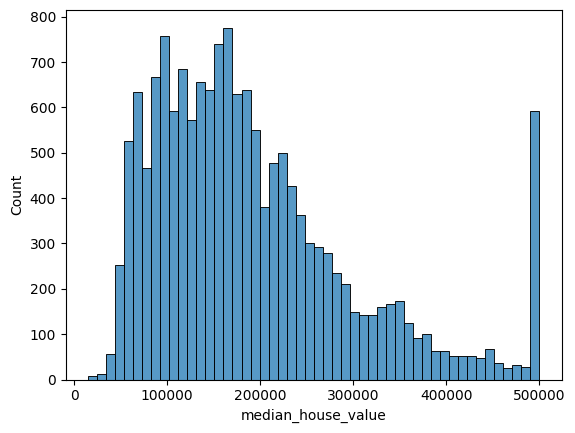

In [4]:
sns.histplot(data.median_house_value, bins=50)

In [5]:
# Question 1
data.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
# Question 2
data['population'].median()

np.float64(1195.0)

In [35]:
# Data Preparation
n = len(data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = data.iloc[idx[n_train:]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [49]:
# NA = 0
X_train_0 = df_train.fillna(value=0).values
# NA = mean
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(value=int(df_train['total_bedrooms'].mean()))
X_train_mean = df_train.values

In [20]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

def train_lr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [50]:
# NA = 0
w0_0, w_0 = train_lr(X_train_0, y_train)
y_pred_0 = w0_0 + X_train_0.dot(w_0)
# NA = mean
w0_mean, w_mean = train_lr(X_train_mean, y_train)
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

<Axes: xlabel='median_house_value', ylabel='Count'>

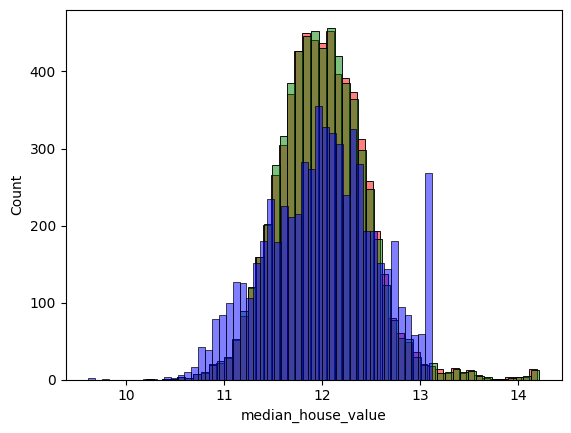

In [53]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='green', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [55]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_val_0 = df_val.fillna(0).values
y_pred_0 = w0_0 + X_val_0.dot(w_0)
rmse(y_val, y_pred_0)

np.float64(0.34023527616112503)

In [61]:
df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(value=int(df_val['total_bedrooms'].mean()))
X_val_mean = df_val.values
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse(y_val, y_pred_0)

np.float64(0.34023527616112503)